In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from numpy import array
from PIL import Image
import numpy
import numpy as np

# input image dimensions
img_rows, img_cols = 28, 28


# number of channels
img_channels = 3

# number of epochs
epochs=20
#batch Size
batch_size=32

target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class10', 
                'class 11', 'class 12', 'class 13', 'class 14', 'class 15', 'class 16', 'class 17', 'class 18', 'class 19', 'class 20',
                'class 21', 'class 22', 'class 23', 'class 24', 'class 25', 'class 26', 'class 27', 'class 28', 'class 29', 'class 30',
                'class 31', 'class 32', 'class 33', 'class 34', 'class 35', 'class 36', 'class 37', 'class 38', 'class 39', 'class 40',
                'class 41', 'class 42', 'class 43', 'class 44', 'class 45', 'class 46', 'class 47', 'class 48', 'class 49', 'class 50',
                'class 51', 'class 52', 'class 53', 'class 54', 'class 55', 'class 56', 'class 57', 'class 58', 'class 59', 'class 60',
                'class 61', 'class 62', 'class 63', 'class 64', 'class 65', 'class 66', 'class 67', 'class 68', 'class 69', 'class 70',
                'class 71', 'class 72', 'class 73', 'class 74', 'class 75', 'class 76', 'class 77', 'class 78', 'class 79', 'class 80',
                'class 81', 'class 82', 'class 83', 'class 84', 'class 85', 'class 86', 'class 87', 'class 88', 'class 89', 'class 90',
                'class 91', 'class 92', 'class 93', 'class 94', 'class 95', 'class 96']

# Path to the folder that is containing all the folders correspond to different class
path = '/home/gitanjali/Desktop/Deep_learning/DL_2020/assignment1/line_data'


list_files = os.listdir(path) # List_Files contains names of different folders inside 
print (list_files)
number_class = len(list_files) # Number of classes
print (number_class) 
num_samples = 0
#Processing images for each class
global combine_matrix # declaration of variable
n_da_per_class = [] # create list for containing size(total number of images) of each class
check_first = 1

for class_n in list_files:
    class_list = os.listdir(path + '/'+ class_n)
    #print("class list", class_list)
    class_im = array(Image.open(path + '/'+ class_n + '/' + class_list[0])) # open one image to get size
    image_m,image_n = class_im.shape[0:2] # get the size of the one image in Class
    class_imnbr = len(class_list) # get the number of images corresponding to each class
    n_da_per_class.append(class_imnbr) # append size of folder in n_da_per_class list
    num_samples = num_samples + class_imnbr
    class_immatrix_n = array([array(Image.open(path + '/'+ class_n + '/' + class_im2)).flatten()
                            for class_im2 in class_list],'f')
    
    #print (os.path.getsize(class_immatrix_n))
    if check_first == 1:
        check_first = 0
        combine_matrix = class_immatrix_n
    else:
        combine_matrix  = numpy.concatenate((combine_matrix, class_immatrix_n), axis=0)  # Combining each matrix
    

label=numpy.ones((num_samples,),dtype = int) # number of elements in label = number of samples
class_ind = 0; # initializing class label
number = 0
sum_number = 0
for data_p_c in n_da_per_class:  # for each image, label is assigned
    number = number + int(data_p_c)
    for i in range(sum_number, number):
        label[i] = class_ind
    class_ind = class_ind + 1
    sum_number = sum_number + int(data_p_c)

data,Label = shuffle(combine_matrix,label, random_state=2)
train_data = [data,Label]
print ((train_data)) 
(x, y) = (train_data[0],train_data[1])
# number of output classes
nb_classes = number_class
print("number of classes",nb_classes)


['Class91', 'Class21', 'Class14', 'Class29', 'Class60', 'Class39', 'Class45', 'Class2', 'Class17', 'Class84', 'Class76', 'Class71', 'Class92', 'Class96', 'Class82', 'Class73', 'Class46', 'Class37', 'Class6', 'Class54', 'Class43', 'Class41', 'Class65', 'Class83', 'Class57', 'Class38', 'Class77', 'Class10', 'Class61', 'Class16', 'Class26', 'Class94', 'Class22', 'Class18', 'Class20', 'Class66', 'Class78', 'Class55', 'Class9', 'Class24', 'Class36', 'Class67', 'Class75', 'Class34', 'Class59', 'Class88', 'Class44', 'Class90', 'Class8', 'Class13', 'Class11', 'Class85', 'Class79', 'Class56', 'Class32', 'Class62', 'Class25', 'Class42', 'Class89', 'Class33', 'Class81', 'Class53', 'Class51', 'Class30', 'Class69', 'Class35', 'Class19', 'Class4', 'Class47', 'Class23', 'Class40', 'Class95', 'Class50', 'Class58', 'Class27', 'Class49', 'Class7', 'Class31', 'Class52', 'Class1', 'Class48', 'Class68', 'Class72', 'Class5', 'Class86', 'Class3', 'Class15', 'Class87', 'Class70', 'Class93', 'Class28', 'Class7

In [4]:
img_rows = 28
img_cols = 28

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

training data (57600, 28, 28, 3)
training labels (57600,)
testing data (38400, 28, 28, 3)
testing labels (38400,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


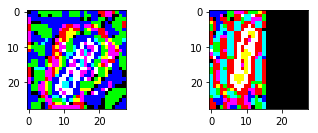

In [5]:
# plot 2 images
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])

In [6]:
# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

normalize training data (57600, 28, 28, 3)
normalize testing data (38400, 28, 28, 3)
training labels (57600,)
testing labels (38400,)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,3)),
    tf.keras.layers.Conv2D(32, 7, strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(96, activation='softmax')
    ])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3965952   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                98400     
Total params: 4,069,216
Trainable params: 4,069,152
Non-trainable params: 64
_____________________________________________

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200)


Train on 57600 samples, validate on 38400 samples
Epoch 1/20
57600/57600 [==============================] - 201s 3ms/sample - loss: 4.4630 - accuracy: 0.1189 - val_loss: 4.4744 - val_accuracy: 0.1470
Epoch 2/20
57600/57600 [==============================] - 113s 2ms/sample - loss: 4.3808 - accuracy: 0.2017 - val_loss: 4.3602 - val_accuracy: 0.2238
Epoch 3/20
57600/57600 [==============================] - 106s 2ms/sample - loss: 4.3257 - accuracy: 0.2564 - val_loss: 4.3219 - val_accuracy: 0.2606
Epoch 4/20
57600/57600 [==============================] - 106s 2ms/sample - loss: 4.3061 - accuracy: 0.2761 - val_loss: 4.3058 - val_accuracy: 0.2766
Epoch 5/20
57600/57600 [==============================] - 106s 2ms/sample - loss: 4.2977 - accuracy: 0.2845 - val_loss: 4.3051 - val_accuracy: 0.2772
Epoch 6/20
57600/57600 [==============================] - 106s 2ms/sample - loss: 4.2922 - accuracy: 0.2897 - val_loss: 4.2932 - val_accuracy: 0.2890
Epoch 7/20
57600/57600 [==========================

In [19]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part1_LINE_trained_model_adam.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part1_LINE_trained_model_adam.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


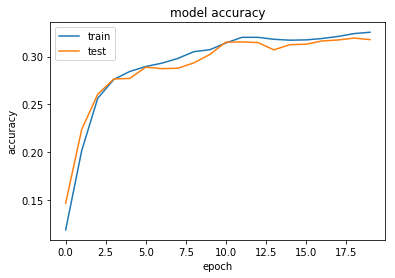

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

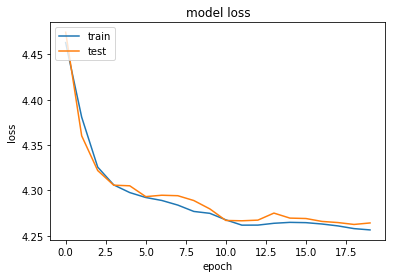

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

38400/38400 [==============================] - 40s 1ms/sample - loss: 4.2642 - accuracy: 0.3178
Accuracy : 31.78%
Baseline Error: 68.22%


In [11]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

#target=target_names = ['class0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'] 

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
print(con)

(38400, 96)
(38400,)
tf.Tensor(
[[  0   0   0 ...   0  71   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 386   0]
 [  0   0   0 ...   0 390   0]
 [  0   0   0 ...   0   0   0]], shape=(96, 96), dtype=int32)


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.00      0.00      0.00       415
           2       0.00      0.00      0.00       404
           3       0.21      1.00      0.35       398
           4       0.00      0.00      0.00       411
           5       0.00      0.00      0.00       394
           6       0.15      1.00      0.27       394
           7       0.66      0.30      0.41       397
           8       0.00      0.00      0.00       394
           9       0.00      0.00      0.00       385
          10       0.00      0.00      0.00       409
          11       0.00      0.00      0.00       405
          12       0.00      0.00      0.00       389
          13       0.00      0.00      0.00       386
          14       0.24      1.00      0.38       333
          15       0.00      0.00      0.00       419
          16       0.00      0.00      0.00       418
          17       0.00    

/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Visualization of activation map and convnet filters

In [10]:
model.load_weights("Q3_part1_LINE_trained_model_adam.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3965952   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                98400     
Total params: 4,069,216
Trainable params: 4,069,152
Non-trainable params: 64
_____________________________________________

In [13]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
print(model.inputs)

[<tf.Tensor 'input_1:0' shape=(None, 28, 28, 3) dtype=float32>]


(1, 28, 28, 3)


(-0.5, 27.5, 27.5, -0.5)

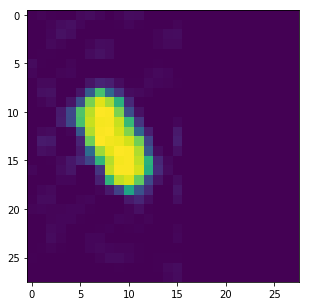

In [20]:
img = x_test[110].reshape(1,28,28,3)
print(img.shape)
figure = plt.figure(figsize=(5,5))
plt.imshow (img[0,:,:,0])
plt.axis('on')

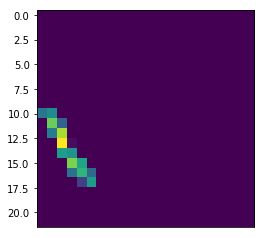

In [29]:
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square1 = 1
square2 = 1
ix = 1
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = plt.subplot(square1, square2, ix)
		ax.set_xticks([])
		#ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-27], cmap='viridis')
		ix += 1
# show the figure
plt.savefig('featuremap_disp_Q3_part1.png')

(7, 7, 3, 32)


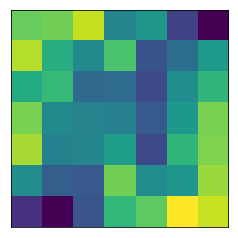

In [32]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    #filters, biases = layer.get_weights()
    #print(layer.name, filters.shape)
    
filters, biases = model.layers[1].get_weights()
filters1 = filters
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max - f_min)
#print(filters.shape, biases.shape)
print(filters1.shape)
#plt.imshow(filters[1, :, :, 0], cmap='viridis')
#plt.show()
# plot all 64 maps in an 8x8 squares
n_filters = 1
ix = 1

for i in range(n_filters):
    f = filters[:, :, :, 27]
    #plot each channel seperately
    for j in range(1):
		# specify subplot and turn of axis
        ax = plt.subplot(n_filters, 1, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='viridis') 
        ix += 1
# show the figure
plt.savefig('featuremap_disp_filter.png')
plt.show()
#plt.axis()